# Normal Distribution Functions

In [1]:
import math
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def my_plot_ndf(alpha_array, func, title):
    x_rad = np.linspace(0.0, math.pi/2, 1000)
    x_deg = np.rad2deg(x_rad)
    
    fig = plt.figure(figsize=[12*len(alpha_array),9])

    for p in range(0,len(alpha_array)):
        a = alpha_array[p]
        plt.subplot(1,len(alpha_array),1+p)
        plt.title(title+"  $\\alpha \\in $[{0},{1}]".format(a[0],a[len(a)-1]))
        plt.xlabel("$\\theta$")
        plt.ylabel("P")
        for ai in a:
            y = [func(ai, theta) for theta in x_rad]
            plt.plot(x_deg, y, label="$\\alpha=${0:.2f}".format(ai))
        plt.legend()

    plt.show()

## Phong NDF

$$
D_{p}(\mathbf{m})=\frac{\alpha_{p}+2}{2 \pi}(\mathbf{n} \cdot \mathbf{m})^{\alpha_{p}}
$$

- $\alpha_{p}$ : roughness parameter
    - high values represent smooth surfaces and low values represent rough ones
    - Values can go arbitrarily high for very smooth surfaces
    - a perfect mirror would require $\alpha_{p} = \infty$
    - a maximally random surface (uniform NDF) can be achieved by setting  $\alpha_{p} = 0$

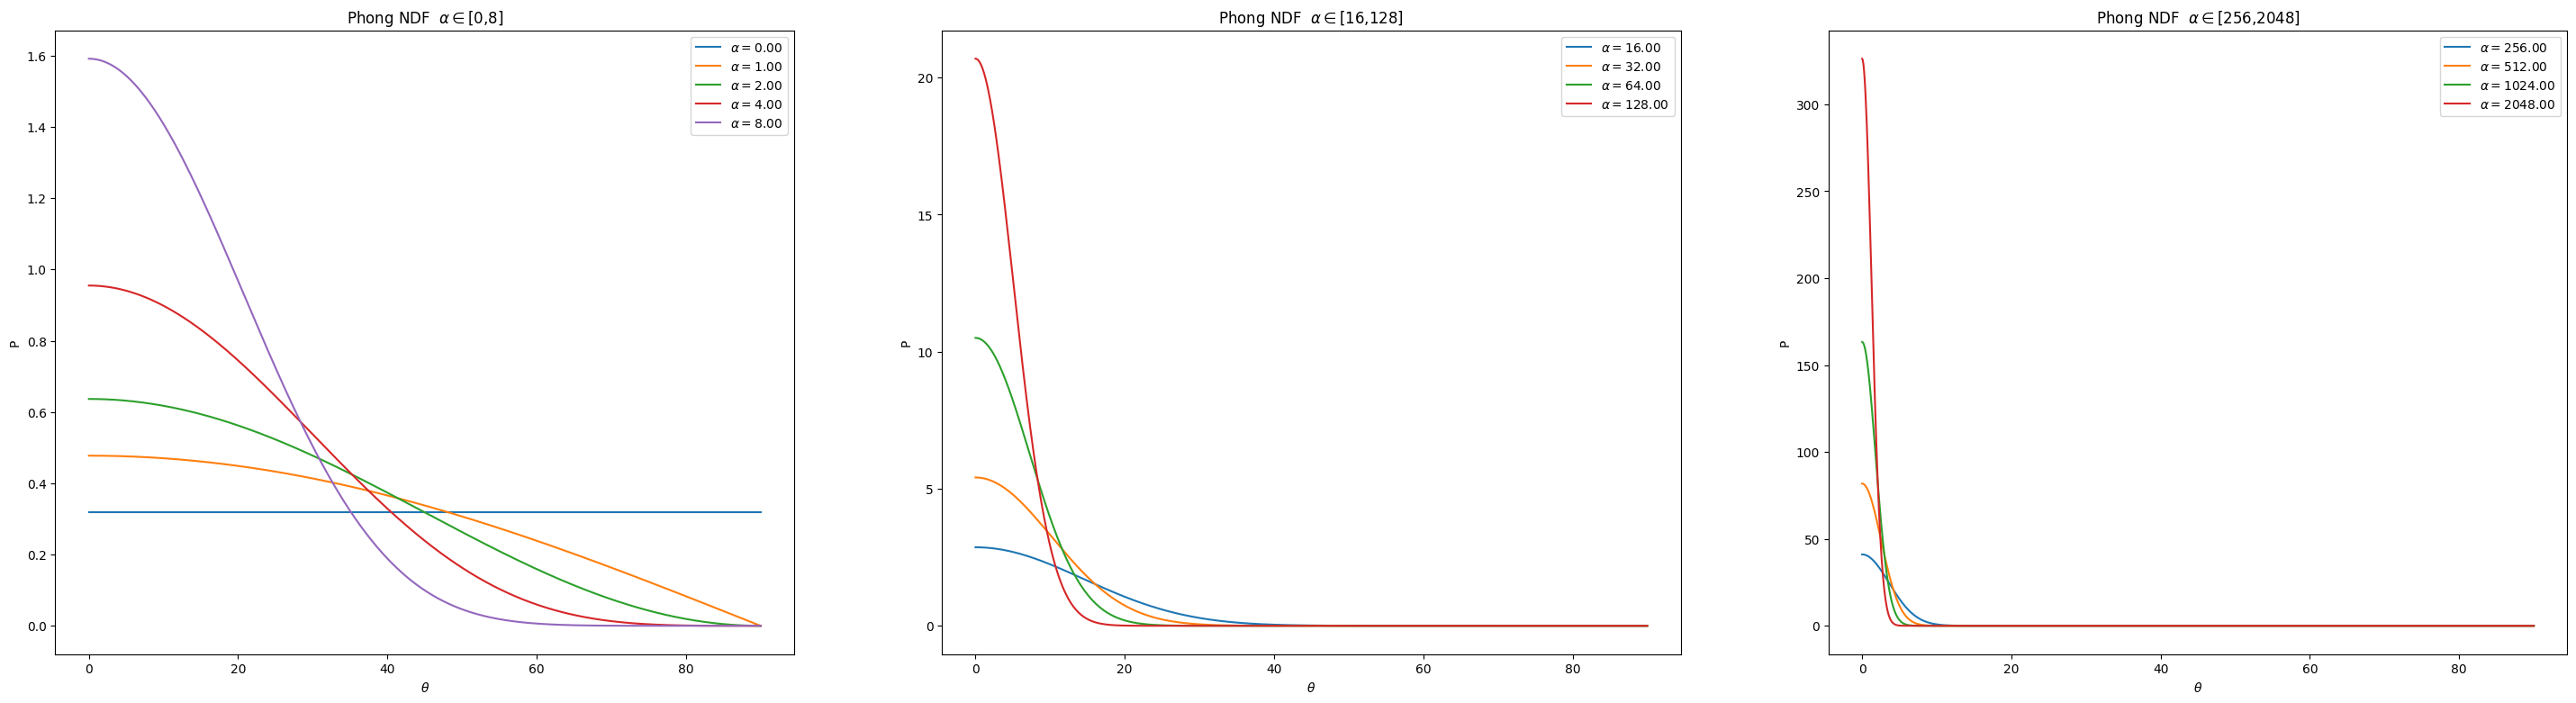

In [3]:
def D_Phong(a, theta):
    NoM = math.cos(theta)
    p1 = (a+2)/(2*math.pi)
    p2 = NoM**a
    return p1*p2

alpha_array = [
    [0,1,2,4,8],
    [16,32,64,128],
    [256, 512, 1024, 2048]
]

my_plot_ndf(alpha_array, D_Phong, "Phong NDF")

## Beckmann NDF

$$
D_{b}(\mathbf{m})=\frac{1}{\pi \alpha_{b}^{2}(\mathbf{n} \cdot \mathbf{m})^{4}} e^{-\left(\frac{1-(\mathbf{n} \cdot \mathbf{m})^{2}}{\alpha_{b}^{2}(\mathbf{n} \cdot \mathbf{m})^{2}}\right)}
$$

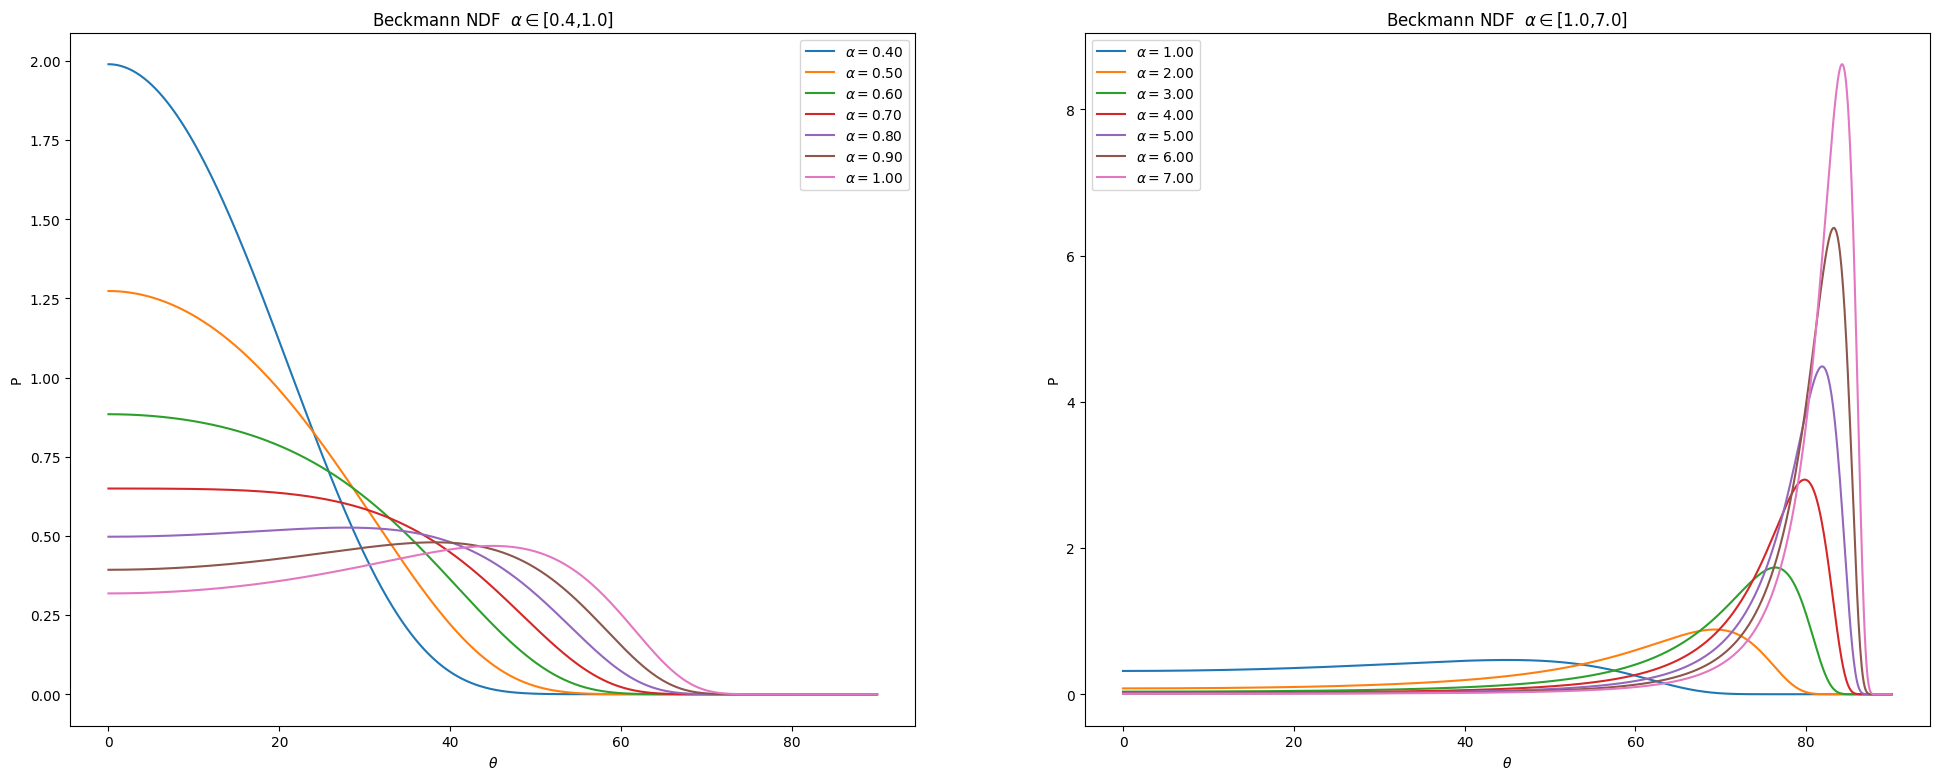

In [4]:
def D_Beckmann(a, theta):
    NoM = math.cos(theta)
    d = math.pi * (a**2) *  (NoM**4)
    p = (1-NoM**2)/((a**2) * (NoM**2))
    return 1/d * math.exp(-p)

alpha_array = [np.linspace(0.4,1.0,7),np.linspace(1,7,7)]
my_plot_ndf(alpha_array, D_Beckmann, "Beckmann NDF")

## Trowbridge-Reitz NDF

- which refers to it as “the GGX distribution”

$$
D_{\mathrm{tr}}(\mathbf{m})=\frac{\alpha_{\mathrm{tr}}^{2}}{\pi\left((\mathbf{n} \cdot \mathbf{m})^{2}\left(\alpha_{\mathrm{tr}}^{2}-1\right)+1\right)^{2}}
$$

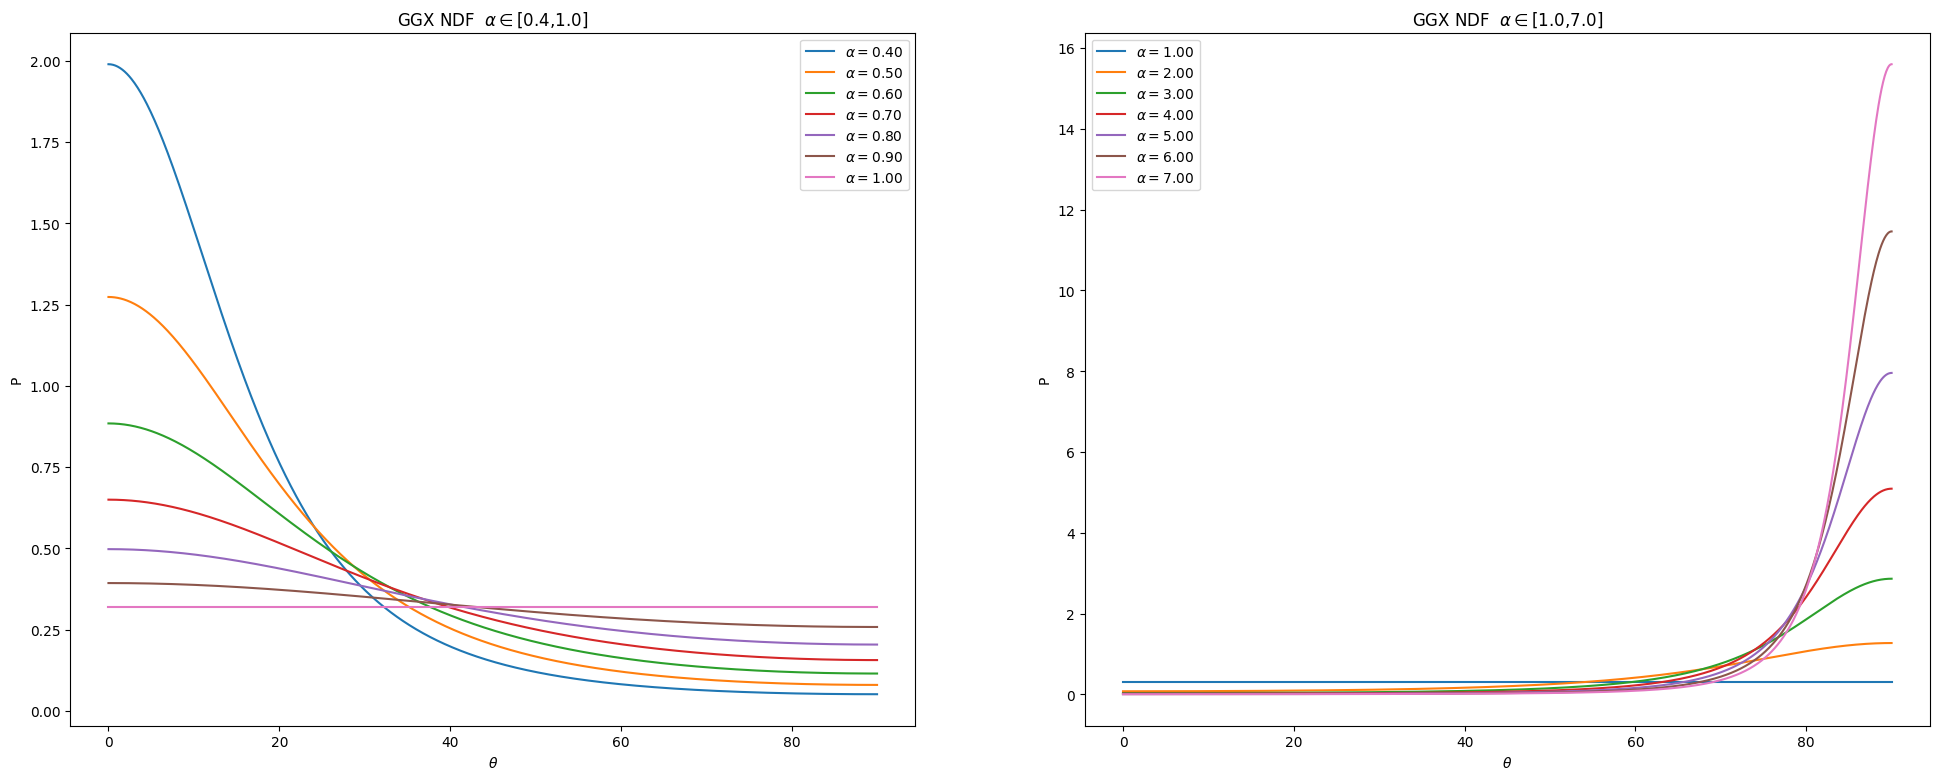

In [5]:
def D_GGX(a, theta):
    NoM = math.cos(theta)
    n = a**2
    d1 = ((NoM)**2)*(a**2-1)+1
    return n/(math.pi*(d1**2))

alpha_array = [np.linspace(0.4,1.0,7),np.linspace(1,7,7)]
my_plot_ndf(alpha_array, D_GGX, "GGX NDF")

## Distributions

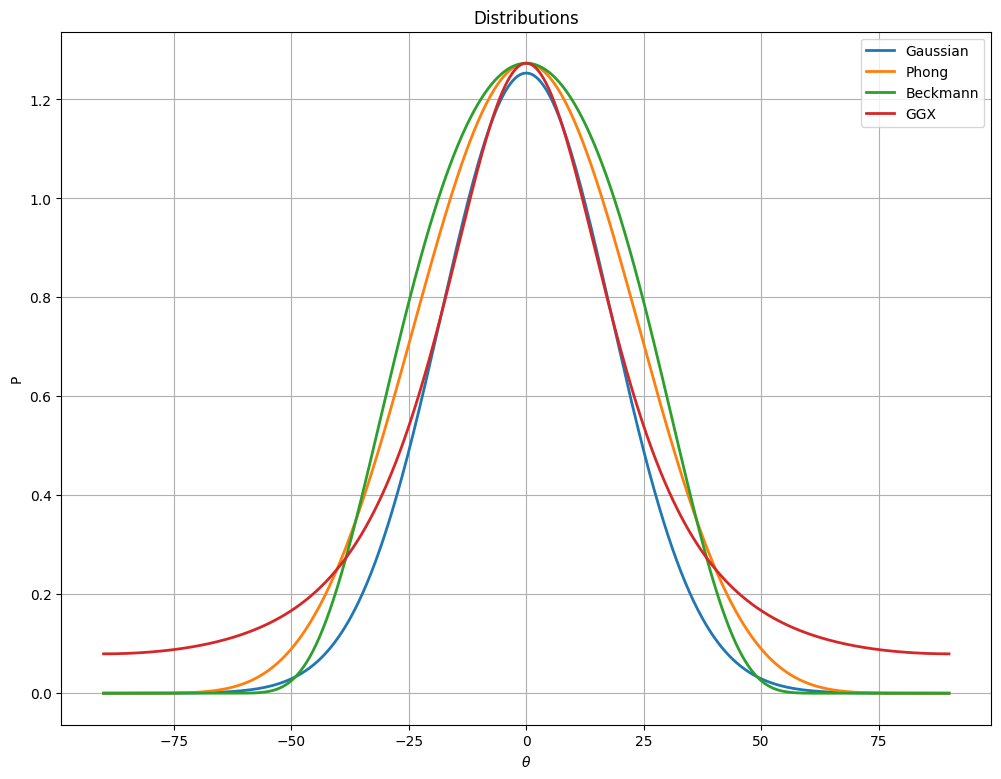

In [6]:
x_deg = np.linspace(-90,90,1000)
x_rad = np.deg2rad(x_deg)

norm_pdf = [norm.pdf(x, 0, 1/math.pi) for x in x_rad]
beckmann = [D_Beckmann(0.5, x) for x in x_rad]
phong = [D_Phong(6, x) for x in x_rad]
ggx = [D_GGX(0.5, x) for x in x_rad]

fig = plt.figure(figsize=[12,9])
plt.title("Distributions")
plt.xlabel("$\\theta$")
plt.ylabel("P")

plt.plot(x_deg, norm_pdf, label="Gaussian", linewidth=2)
plt.plot(x_deg, phong, label="Phong", linewidth=2)
plt.plot(x_deg, beckmann, label="Beckmann", linewidth=2)
plt.plot(x_deg, ggx, label="GGX", linewidth=2)

plt.legend()
plt.grid()
plt.show()


## Reference

- [SIGGRAPH 2013, Background: Physics and Math of Shading](https://blog.selfshadow.com/publications/s2013-shading-course)